In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("churn_modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


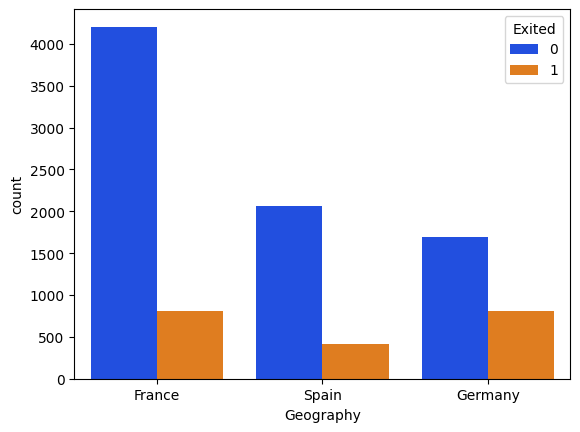

In [8]:
sns.countplot(df, x = "Geography",hue="Exited",palette="bright")
plt.show()

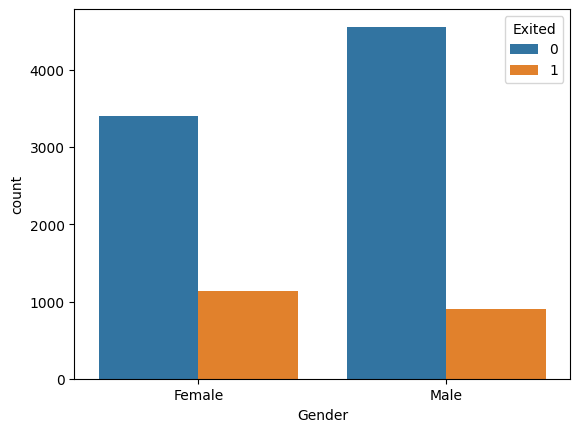

In [9]:
sns.countplot(df,x="Gender",hue="Exited")
plt.show()

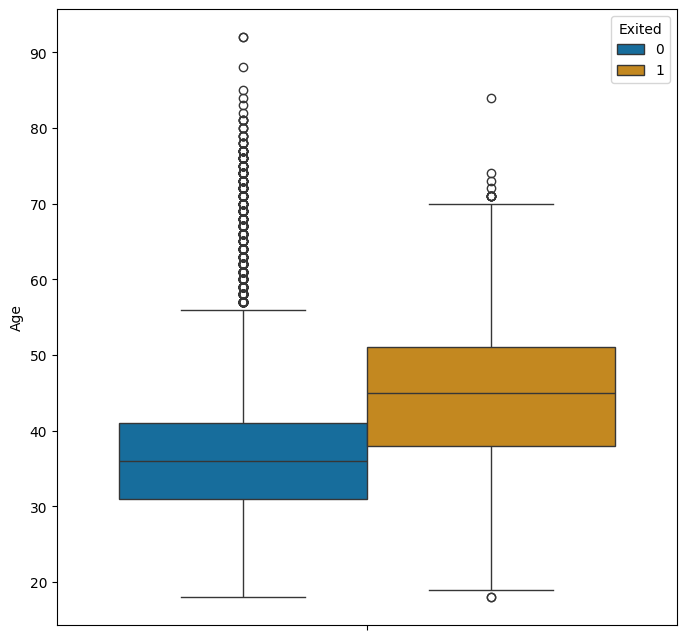

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(df,y='Age',hue="Exited",palette="colorblind")
plt.show()

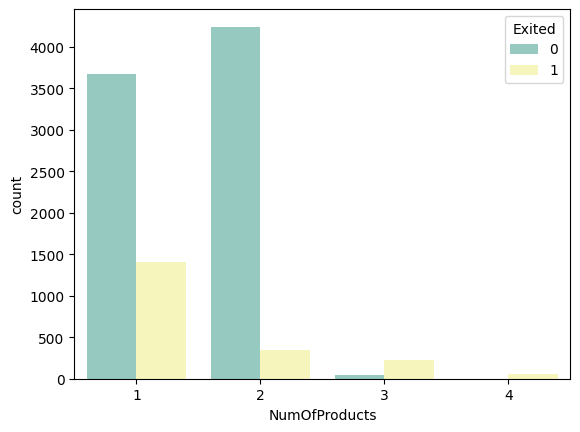

In [11]:
sns.countplot(df, x='NumOfProducts', palette='Set3',hue="Exited")
plt.show()

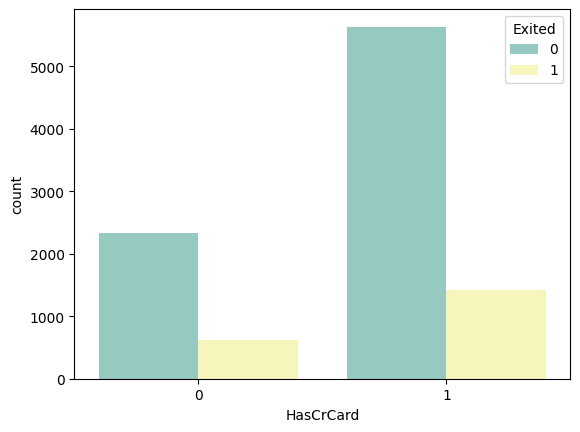

In [12]:
sns.countplot(df, x='HasCrCard', palette='Set3',hue="Exited")
plt.show()

In [13]:
df = pd.get_dummies(df, columns=["Geography","Gender"],drop_first = True,dtype = int)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [15]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

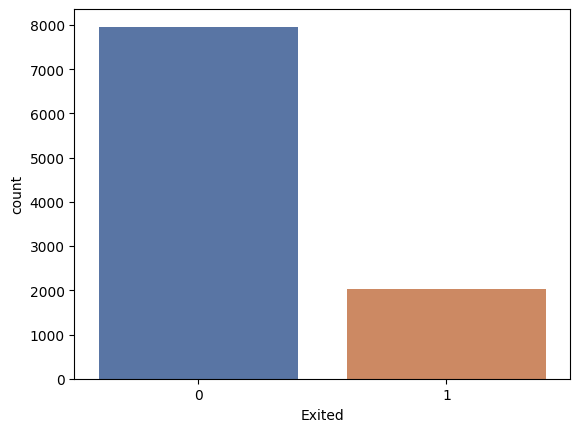

In [16]:
sns.countplot(df,x="Exited",palette="deep")
plt.show()

In [17]:
Exited_0 = df[df.Exited == 0]
Exited_1 = df[df.Exited == 1]

In [18]:
print(Exited_0.shape)
print(Exited_1.shape)

(7963, 12)
(2037, 12)


In [19]:
Exited_sample_0 = Exited_0.sample(n=2037)

In [20]:
new_df = pd.concat([Exited_sample_0,Exited_1])

In [21]:
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6217,693,31,2,0.00,2,1,1,107759.31,0,0,0,1
261,726,48,6,99906.19,1,1,0,64323.24,0,0,1,0
3933,698,37,5,98400.61,2,0,0,25017.28,0,0,0,1
7301,767,33,1,144753.21,1,1,1,132480.75,0,1,0,0
3954,729,34,9,132121.71,1,0,1,105409.31,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,1,53445.17,1,1,0,1
9982,655,46,7,137145.12,1,1,0,115146.40,1,1,0,0
9991,597,53,4,88381.21,1,1,0,69384.71,1,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


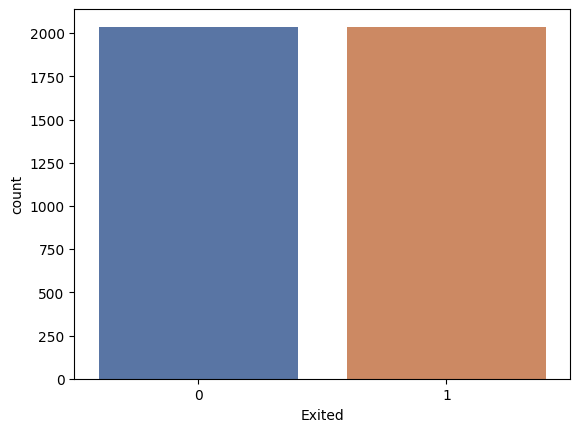

In [22]:
sns.countplot(new_df,x="Exited",palette="deep")
plt.show()

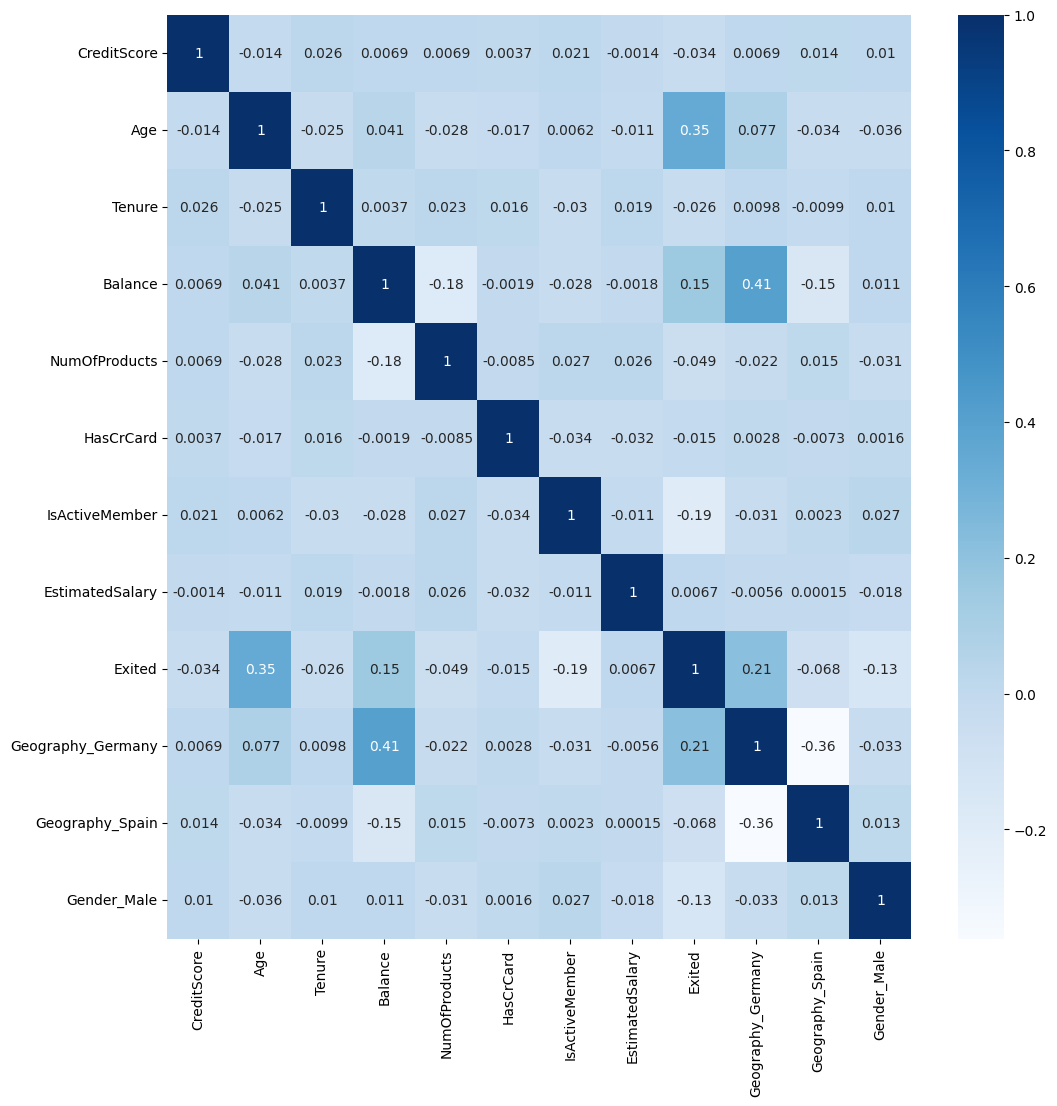

In [23]:
plt.figure(figsize = (12, 12))
sns.heatmap(new_df.corr(), annot = True,cmap="Blues")
plt.show()

In [24]:
X = new_df.drop(columns="Exited",axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6217,693,31,2,0.00,2,1,1,107759.31,0,0,1
261,726,48,6,99906.19,1,1,0,64323.24,0,1,0
3933,698,37,5,98400.61,2,0,0,25017.28,0,0,1
7301,767,33,1,144753.21,1,1,1,132480.75,1,0,0
3954,729,34,9,132121.71,1,0,1,105409.31,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,1,53445.17,1,0,1
9982,655,46,7,137145.12,1,1,0,115146.40,1,0,0
9991,597,53,4,88381.21,1,1,0,69384.71,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0


In [25]:
y = new_df["Exited"]
y

6217    0
261     0
3933    0
7301    0
3954    0
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Exited, Length: 4074, dtype: int64

In [26]:
scaler = StandardScaler()

In [27]:
X = scaler.fit_transform(X)

In [28]:
X

array([[ 0.44997478, -0.95582059, -1.04012346, ..., -0.65725637,
        -0.54880027,  0.98586329],
       [ 0.78527671,  0.64224387,  0.34263489, ..., -0.65725637,
         1.82215655, -1.01433942],
       [ 0.5007781 , -0.39179784, -0.00305469, ..., -0.65725637,
        -0.54880027,  0.98586329],
       ...,
       [-0.52544901,  1.11226283, -0.34874428, ..., -0.65725637,
        -0.54880027, -1.01433942],
       [ 0.61254541, -0.48580163,  0.68832448, ..., -0.65725637,
        -0.54880027, -1.01433942],
       [ 1.25266727,  0.07822112, -0.69443387, ...,  1.52147631,
        -0.54880027,  0.98586329]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [32]:
pred_train = model.predict(X_train)
acc_train = accuracy_score(pred_train,y_train)
acc_train

0.8192697146363915

In [33]:
pred_test = model.predict(X_test)
acc_test = accuracy_score(pred_test,y_test)
acc_test

0.803680981595092

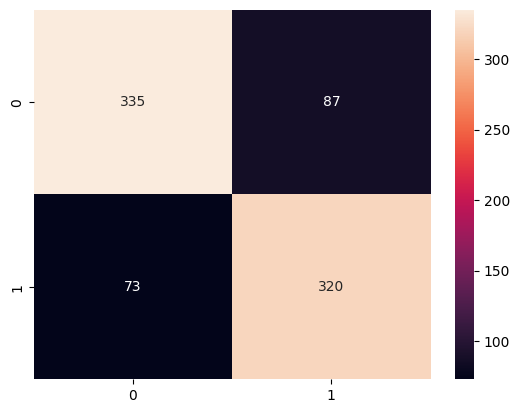

In [34]:
sns.heatmap(confusion_matrix(pred_test,y_test),annot=True,fmt = "d")
plt.show()

In [35]:
input_data = (627,28,3,157597.61,1,0,1,34097.22,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

[[-0.22062908 -1.23783196 -0.69443387  1.23635094 -0.75686927 -1.54940885
   1.08994033 -1.16901494 -0.65725637  1.82215655 -1.01433942]]
[0]


In [36]:
input_data = (655,46,7,137145.12,1,1,0,115146.40,1,0,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction_1 = model.predict(std_data)
print(prediction_1)

[[ 0.06386953  0.45423629  0.68832448  0.90291465 -0.75686927  0.64540744
  -0.91748142  0.24540152  1.52147631 -0.54880027 -1.01433942]]
[1]


In [38]:
import joblib
joblib.dump(scaler, "bank_churn_scaler.joblib")
joblib.dump(model, "bank_churn_model.joblib")

['bank_churn_model.joblib']